In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
import numpy as np
import sys
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft
from scipy import signal
from scipy.interpolate import interp1d
abspath = '/home/shubham1/spartan_mount'
# abspath = '/data/cephfs/punim0895'
sys.path.append(abspath + '/hwu1/slicedatareadWriteHipstar/jupyter_codes')
# from deriv import *
# from lib_msh import *
import scipy.io as sio
path = abspath + '/hwu1/slicedatareadWriteHipstar/cd_airfoil_inputData_allMach/'

In [2]:
allmach = [0.2,0.3,0.4,0.5]
datall = [None]*len(allmach)
xall = [None]*len(allmach)
yall = [None]*len(allmach)
for k,M in enumerate(allmach):
    DATAF2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/flowdata_b2_M0'+str(int(M*10))+'.npz')
    DATAG2 = np.load(path+'M0'+str(int(M*10))+'_spod_data/griddata_b2_M0'+str(int(M*10))+'.npz')
    datall[k] = DATAF2['p1']
    xall[k] = DATAG2['x1']
    yall[k] = DATAG2['y1']

In [3]:
allmach = [0.2,0.3,0.4,0.5]
datall1 = [None]*len(allmach)
xall1 = [None]*len(allmach)
yall1 = [None]*len(allmach)
for k,M in enumerate(allmach):
    DATAF3 = np.load(path+'M0'+str(int(M*10))+'_spod_data/flowdata_b3_M0'+str(int(M*10))+'.npz')
    DATAG3 = np.load(path+'M0'+str(int(M*10))+'_spod_data/griddata_b3_M0'+str(int(M*10))+'.npz')
    datall1[k] = DATAF3['p2']
    xall1[k] = DATAG3['x2']
    yall1[k] = DATAG3['y2']

In [4]:
xall1[0].shape

(73, 429)

<IPython.core.display.Javascript object>


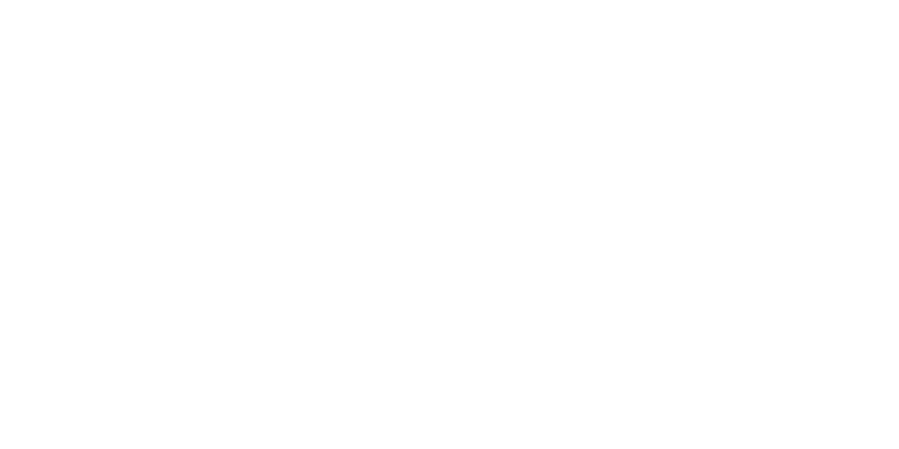

In [5]:
%matplotlib notebook
xx=720
yy = 650
for i in range(1):
    tt = i*3
    fig = plt.figure(figsize=(10,5))    
    levels=None
    zz =248
#     maxval = np.max(flowdata1[:,:zz,tt])/1
#     maxval =0.02
#     levels=np.linspace(-maxval, maxval,100)
    plt.contourf(xall[0],yall[0],datall[0][:,:,1],256,levels=levels,cmap='coolwarm',extend='both')
    plt.contourf(xall1[0][30:50,0:200],yall1[0][30:50,:200],datall1[0][30:50,:200,1],256,levels=levels,cmap='coolwarm',extend='both')

    plt.grid(False)
    cbar=plt.colorbar(orientation='vertical')


(242, 288)
68
(68,)


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in divide
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in divide
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in greater_equal
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in less_equal
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in greater_equal
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in less_equal
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in greater_equal
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in less_eq

<IPython.core.display.Javascript object>


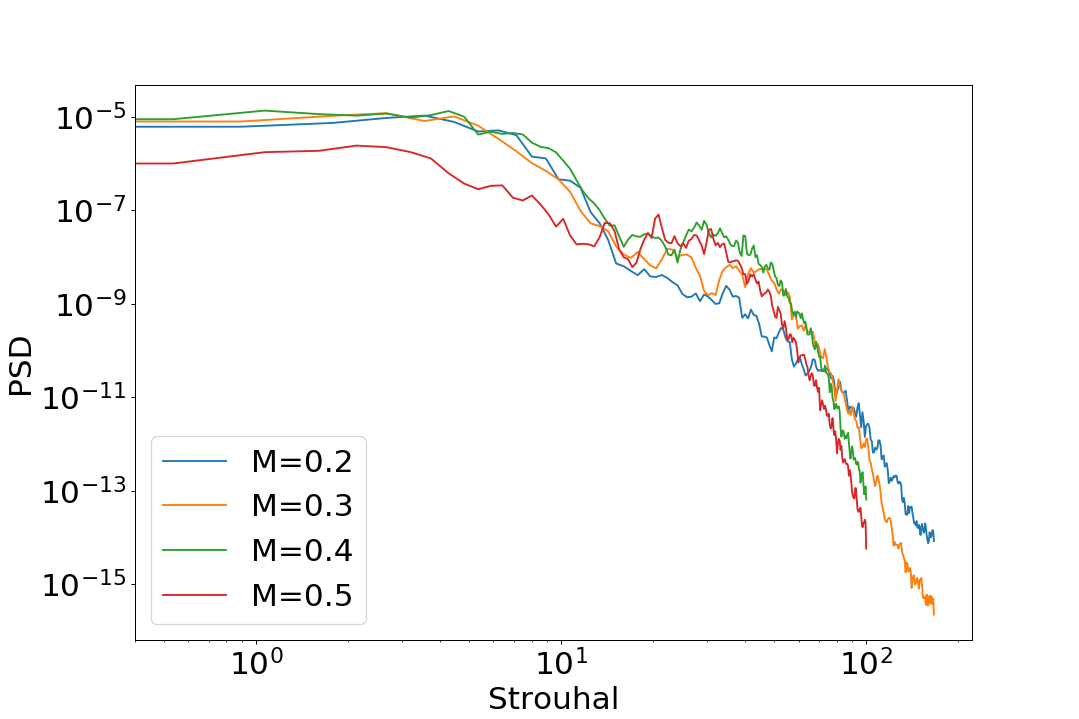

<IPython.core.display.Javascript object>


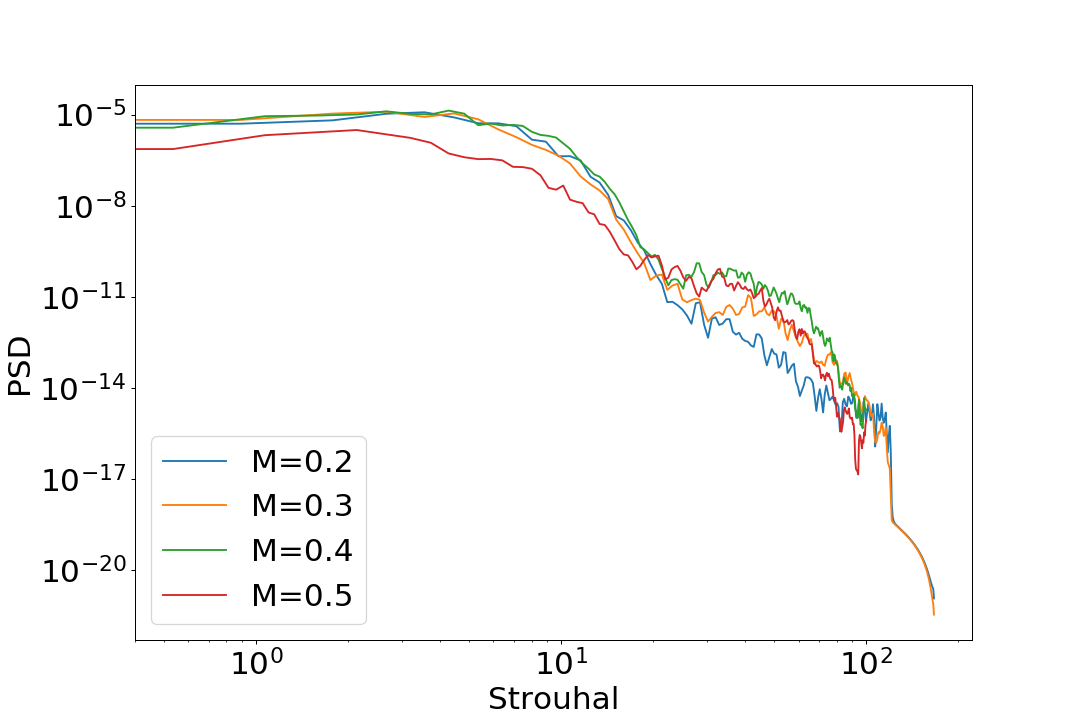

<IPython.core.display.Javascript object>


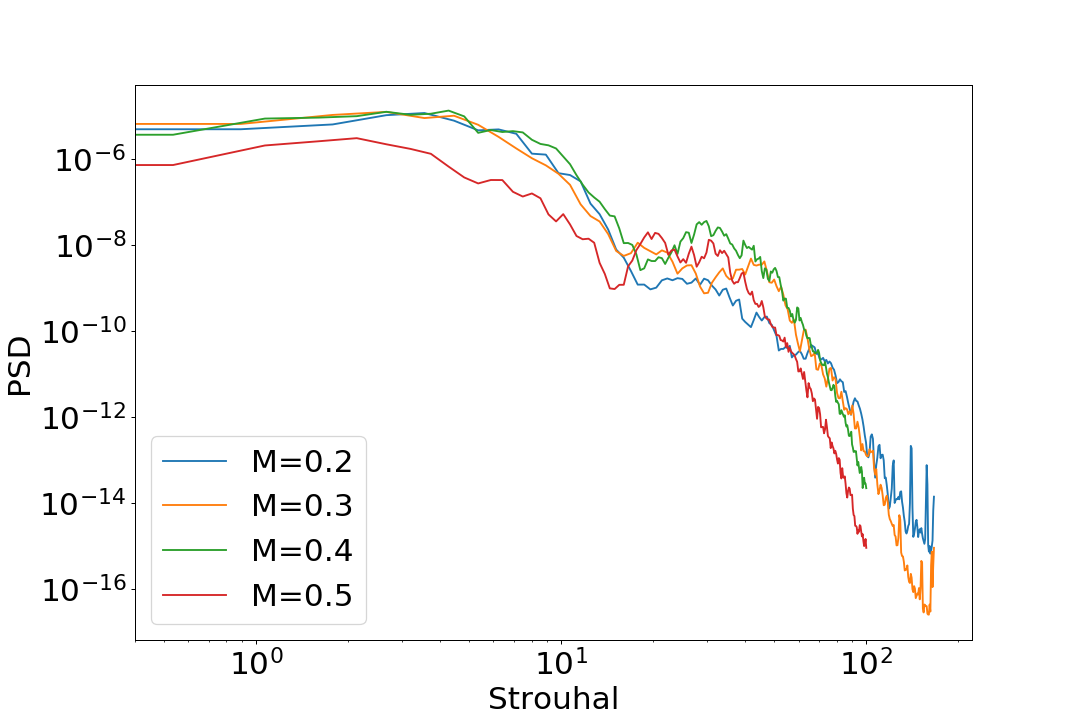

<IPython.core.display.Javascript object>


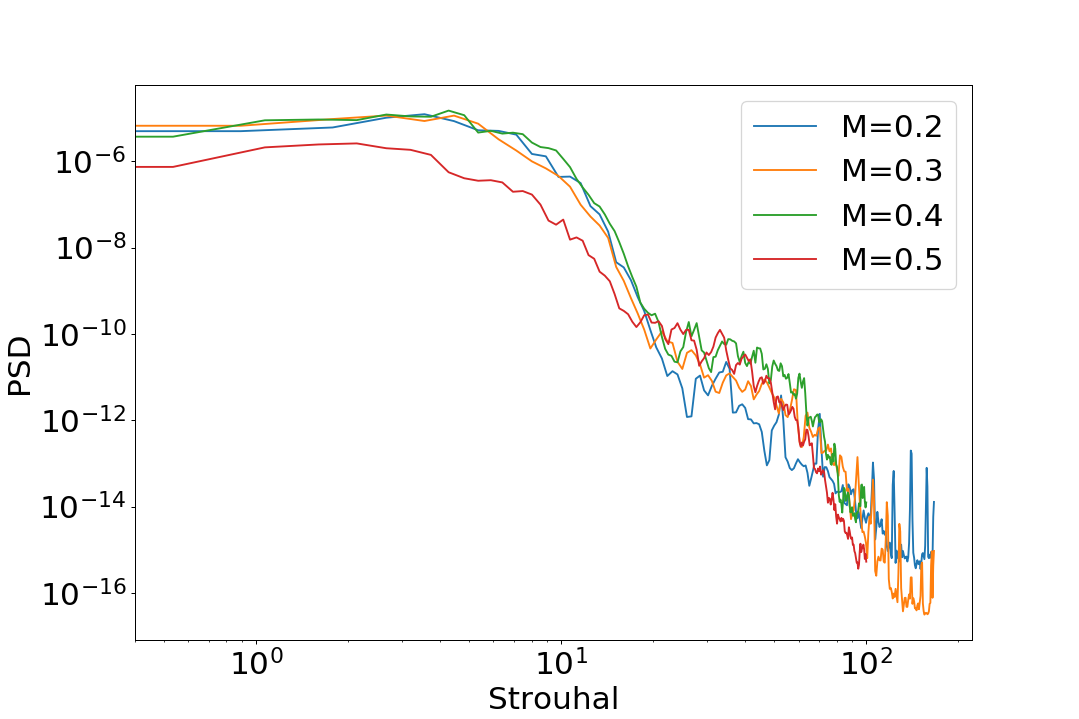

<IPython.core.display.Javascript object>


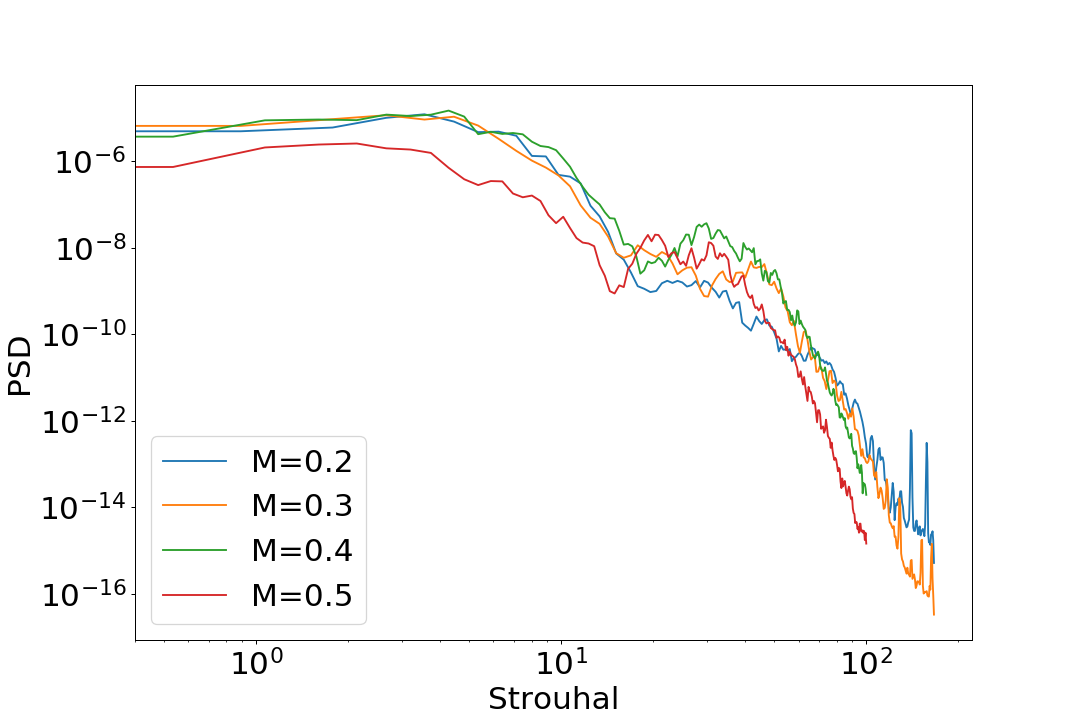

<IPython.core.display.Javascript object>


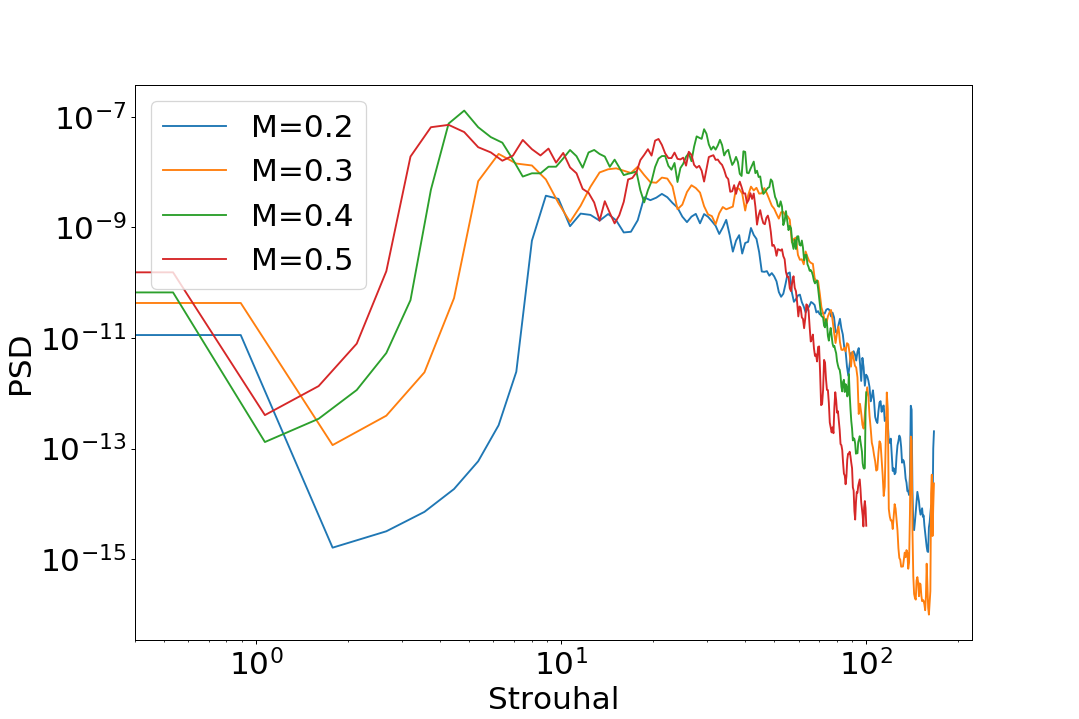

<IPython.core.display.Javascript object>


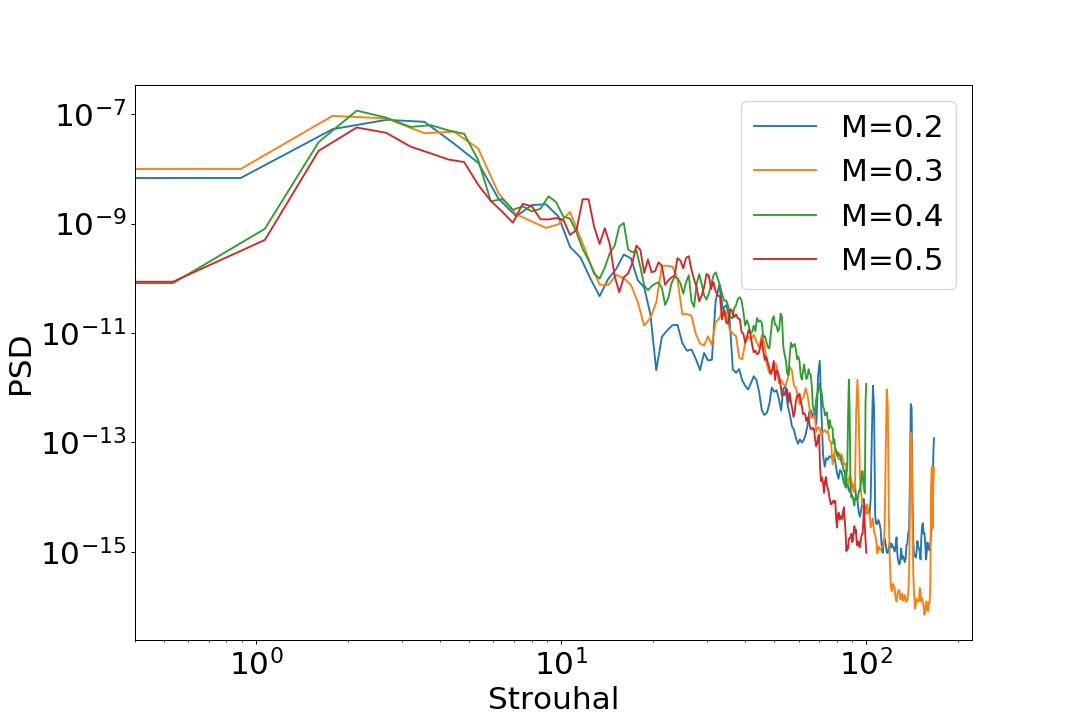

<IPython.core.display.Javascript object>


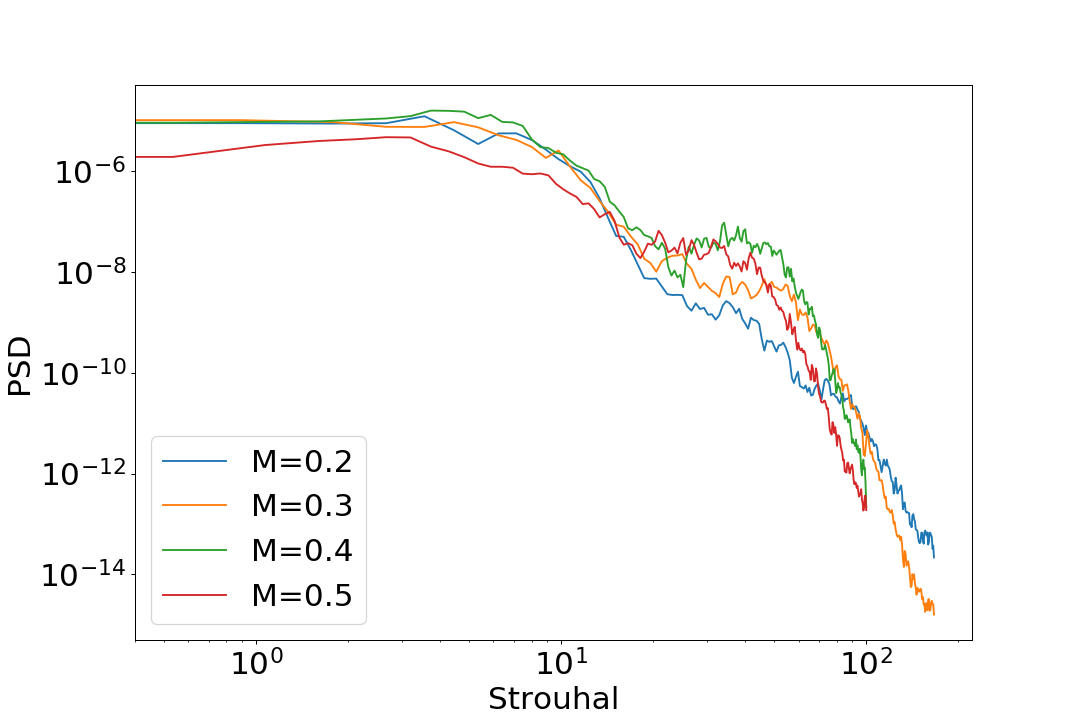

<IPython.core.display.Javascript object>


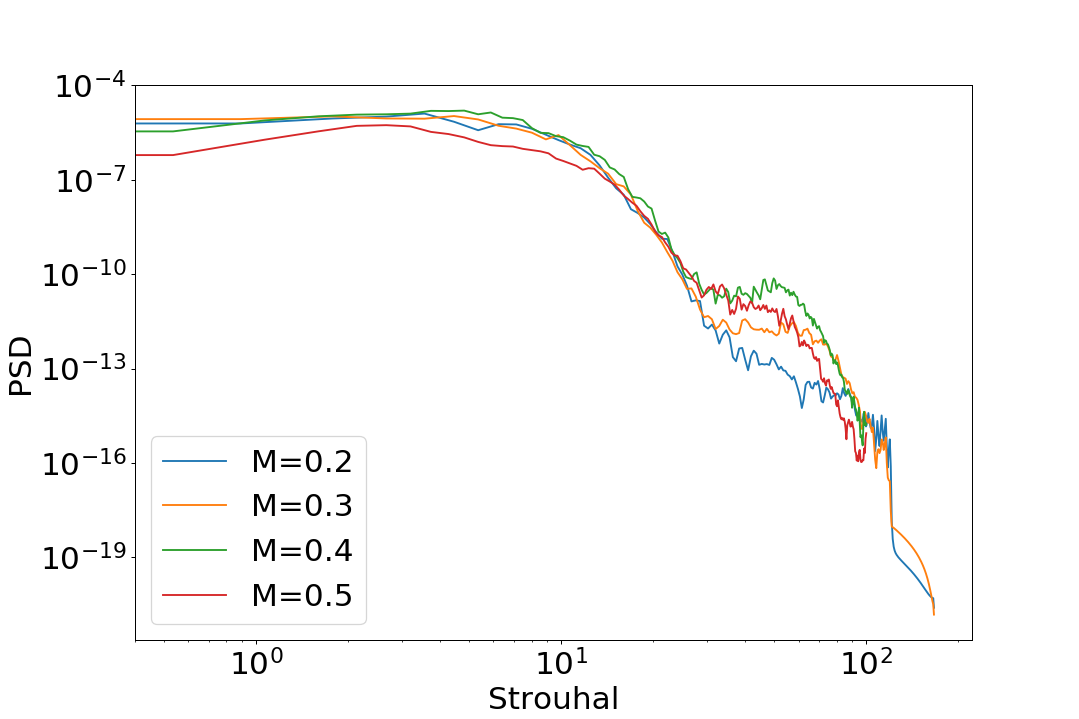

<IPython.core.display.Javascript object>


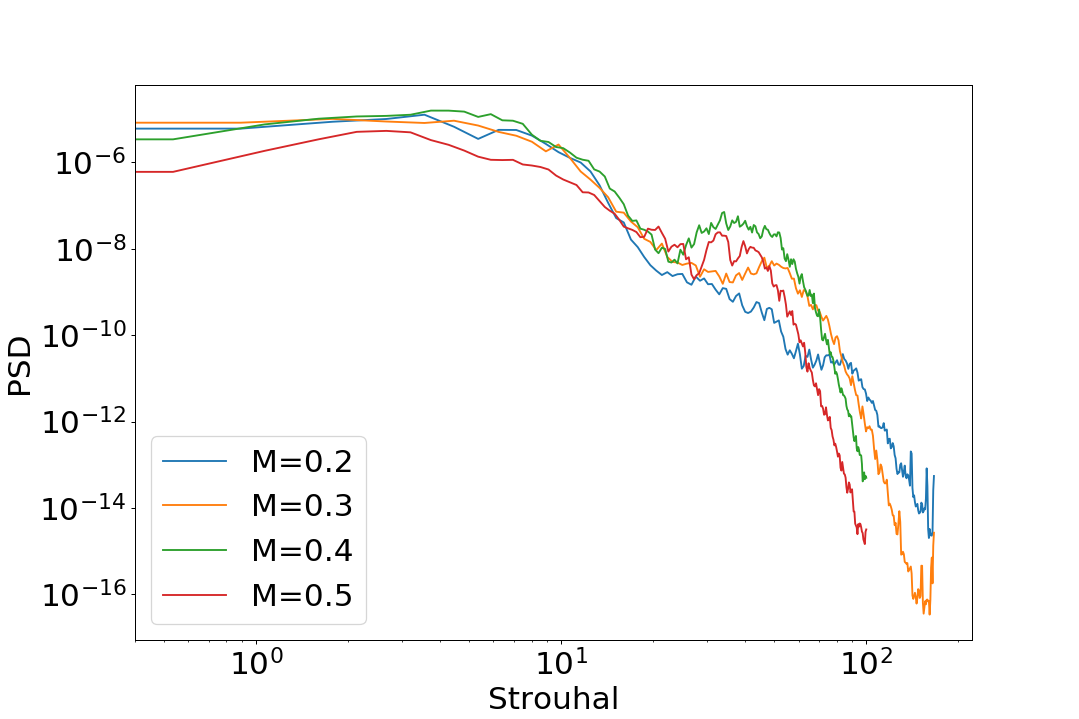

<IPython.core.display.Javascript object>


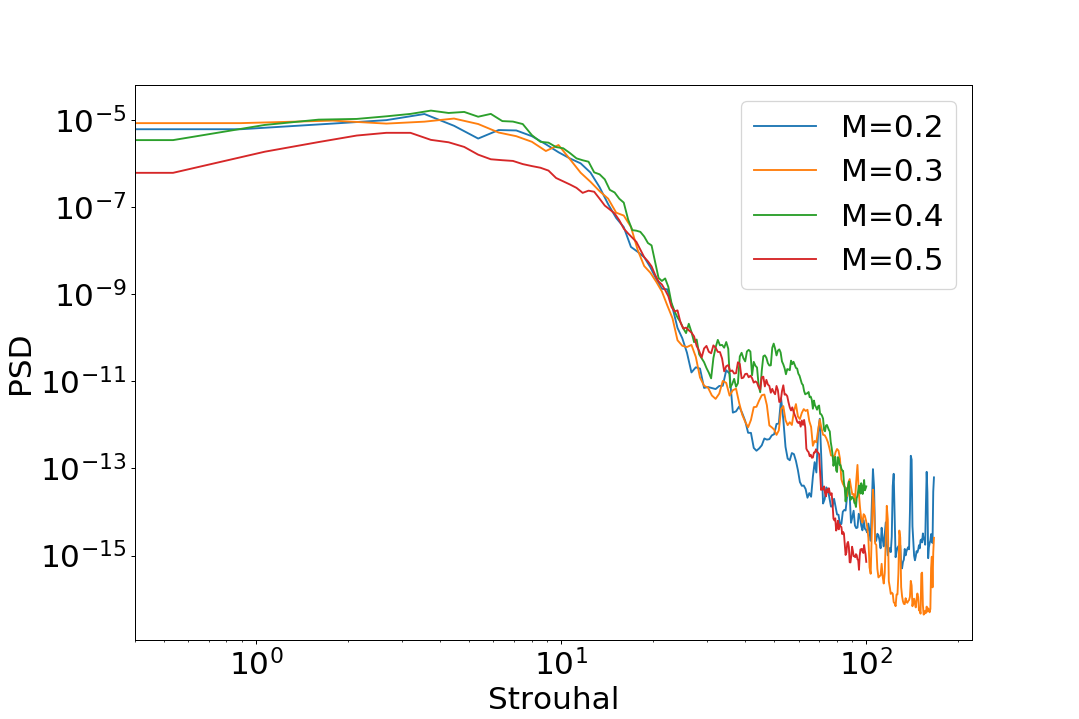

<IPython.core.display.Javascript object>


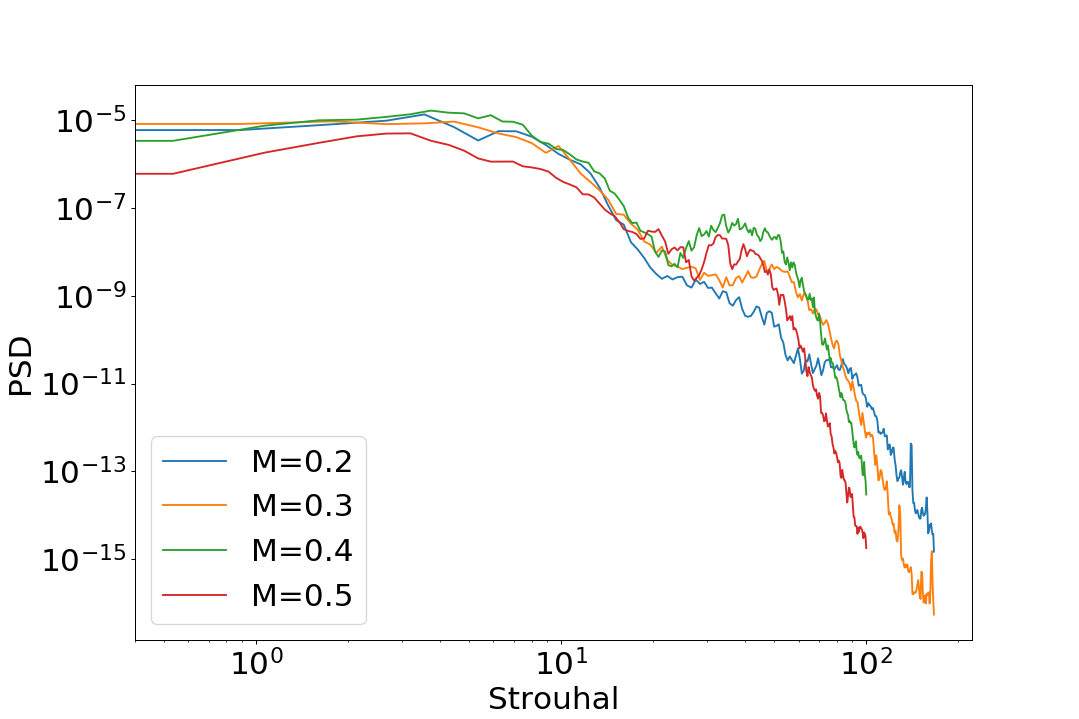

<IPython.core.display.Javascript object>


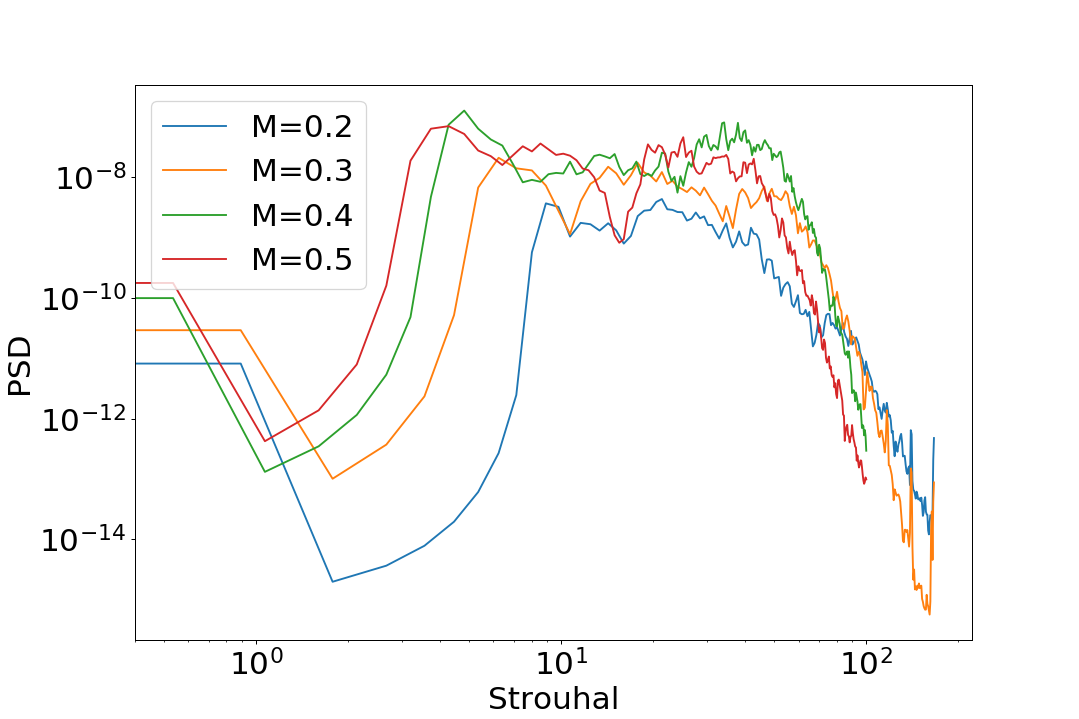

<IPython.core.display.Javascript object>


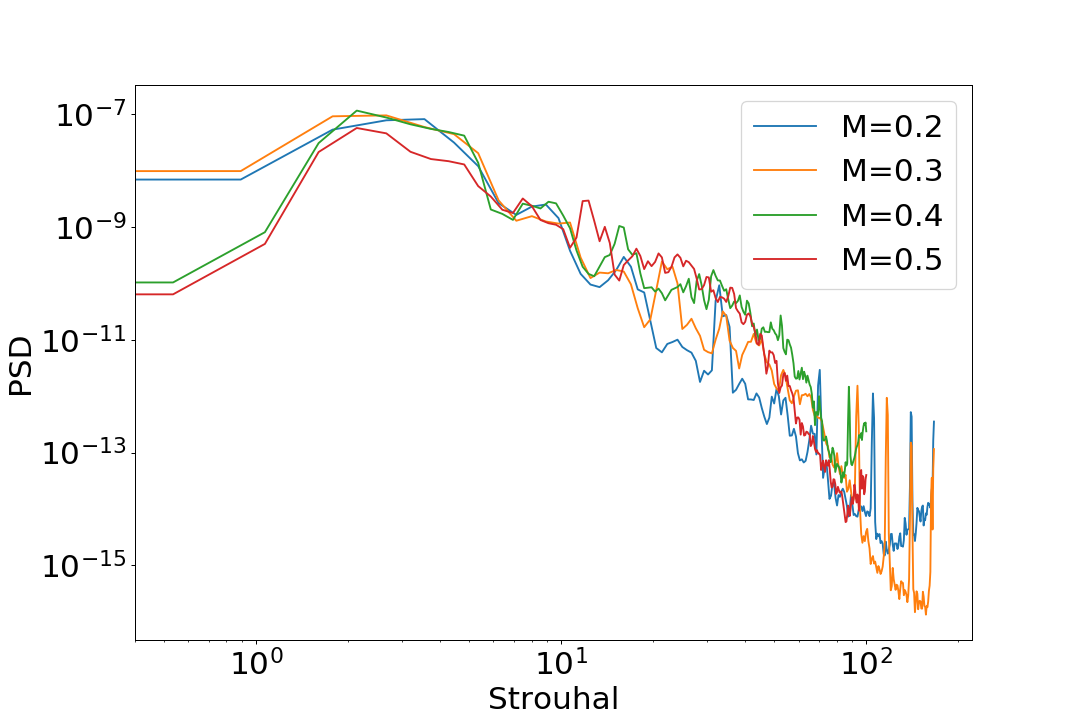

(242, 288)
68
(68,)
(242, 288)
68
(68,)
(242, 288)
67
(67,)


In [29]:
%matplotlib notebook
import os
dtall = [0.003,0.003,0.005,0.005]
block =3

xstart = 0.4
xend = 1.0
dirpath = 'block'+ str(block) + '_loc_' + str(xstart) + '-' + str(xend)
try:
    os.stat('./spach_plot/'+dirpath)
except:
    os.mkdir('./spach_plot/'+dirpath)
    
for k,M in enumerate(allmach):
    if block==3:
        xind = 40
        x = xall1[k][xind,:]
        y = yall1[k][xind,:]
        data = datall1[k][xind,:,:]
        indexxs = np.max(np.where(np.abs(x-xstart)<0.03))
        indexxe = np.max(np.where(np.abs(x-xend)<0.03))
    else:
        xind = 0
        x = xall[k][:,xind]
        y = yall[k][:,xind]
        data = datall[k][:,xind,:]
        indexxs = np.max(np.where(np.abs(x-xstart)<0.03))
        indexxe = np.max(np.where(np.abs(x-xend)<0.03))

    print(indexxs,indexxe)        

#     Nt = data[k].shape[-1]
#     # St = data[270:,0,0].shape[0]
#     dt=dtall[k]
#     indexx=370
#     tf = np.linspace(0, 1.0/(2.0*dt), Nt//2)
#     # Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
#     dx = np.min(np.abs(x[270:,0]-x[269:-1,0]))*10
#     St = int((x[-1,0]-x[indexx,0])//dx)
#     print St
#     Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
#     SS = np.linspace(0,(St-1)*dx,St)
#     print SS.shape
#     data_mod = np.zeros((Nt,St))
#     # print np.min(data[270:,0]-data[270,0])
#     for nt in range(Nt):
#         data_mod[nt,:] = interp1d(x[indexx:,0]-x[indexx,0],data[indexx:,0,nt])(SS)
#----------------------------------------------------------------------------------------------------------       
  
    Nt = data.shape[-1]
    dt=dtall[k]

    tf = np.linspace(0, 1.0/(2.0*dt), Nt//2)
    # Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
    dx = np.min(np.abs(x[indexxs:indexxe-1]-x[indexxs+1:indexxe]))
    St = int((x[indexxe]-x[indexxs])//dx)-2
    print(St)
    Sf = np.linspace(0, 1.0/(2.0*dx), St//2)
    SS = np.linspace(0,(St-1)*dx,St)
    print(SS.shape)
    data_mod = np.zeros((Nt,St))
    # print np.min(data[270:,0]-data[270,0])
    for nt in range(Nt):
        data_mod[nt,:] = interp1d(x[indexxs:indexxe]-x[indexxs],data[indexxs:indexxe,nt])(SS)


    tt = np.linspace(0,(Nt-1)*dt,Nt)

    tf = np.fft.fftshift(np.fft.fftfreq(Nt,dt))
    Sf = np.fft.fftshift(np.fft.fftfreq(St,dx))

    Xtemp = tf[:]    # w
    Ytemp = Sf[:]    # k
    X, Y = np.meshgrid(Xtemp, Ytemp)

    Ys, Xt = np.meshgrid(SS,tt)

    UC  = X/Y
    ind1 = St//2-100    # St- No. of points
    ind2 = St//2+100    
        
    mac = 1.0/M
    mhy = 1
    FS = np.fft.fft2(np.flip(np.transpose(data_mod),axis=-1))

    FS1 = np.fft.fft2(np.flip(np.transpose(data_mod),axis=-1))
    Z6 = np.fft.fftshift(FS1)

    ind3=np.where(np.logical_or(UC>= 2, UC<= -1.0))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFShy = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))


    ind3=np.where(np.logical_or(UC>= 2*mac, UC<= -1.0))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFShacp = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))

    ind3=np.where(np.logical_or(UC>= 2, UC<= -2.0*mac))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFShacn = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))

    ind3=np.where(np.logical_or(UC>= 2*mac, UC<= -2*mac))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFShacpn = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))

    ind3=np.where(np.logical_or(UC>= 4*mac, UC<= mac))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFSacp = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))

    ind3=np.where(np.logical_or(UC>= -1, UC<= -4*mac))
    Ztemp=np.copy(Z6)
    Ztemp[ind3] = 0
    Ztemp2 = np.fft.ifftshift(Ztemp)
    IFSacn = np.real(np.transpose(np.flip(np.fft.ifftn(Ztemp2),axis=-1)))

    IFSorig = np.real(np.transpose(np.flip(np.fft.ifft2(FS),axis=-1)))
    
    

#     levels=np.linspace(-0.03,0.03,256)
#     # levels=None
#     fig = plt.figure(figsize=(10,5))    
#     cba1 = plt.contourf(Xt,Ys,IFSorig,256,levels=levels,cmap='coolwarm',extend='both')
#     clb1 = plt.colorbar(cba1,orientation='vertical')
#     plt.tight_layout()
#     plt.xlabel('time')
#     plt.ylabel('pressure')
#     plt.rcParams['font.size']=15
#     plt.show()
# #     plt.savefig('FFT_bandpass_M02.png',dpi=300,bbox_inches="tight")


    f=1/dt
    for kk,pt in enumerate([-20]):
        freq1, Pxx_den1 = signal.welch(IFSorig[:,pt], f,nperseg=Nt//8)
        freq2, Pxx_den2 = signal.welch(IFShy[:,pt], f,nperseg=Nt//8)
        freq3, Pxx_den3 = signal.welch(IFShacp[:,pt], f,nperseg=Nt//8)

        freq4, Pxx_den4 = signal.welch(IFShacn[:,pt], f,nperseg=Nt//8)
        freq5, Pxx_den5 = signal.welch(IFShacpn[:,pt], f,nperseg=Nt//8)
        freq6, Pxx_den6 = signal.welch(IFSacp[:,pt], f,nperseg=Nt//8)
        freq7, Pxx_den7 = signal.welch(IFSacn[:,pt], f,nperseg=Nt//8)
#         kk=int(M*1000)
        fig = plt.figure(kk,figsize=(12,8)) 
#         plt.loglog(freq1, Pxx_den1,label='original'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq1, Pxx_den1,label='M='+str(M))
#         plt.loglog(freq1, Pxx_den1,label='x='+str(SS[pt])[0:5])

        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_1_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")

        fig = plt.figure(kk+10,figsize=(12,8)) 
#         plt.loglog(freq2, Pxx_den2,label='-1<U<2'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq2, Pxx_den2,label='M='+str(M))
#         plt.loglog(freq2, Pxx_den2,label='x='+str(SS[pt])[0:5])

        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_2_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")


        fig = plt.figure(kk+20,figsize=(12,8)) 
#         plt.loglog(freq3, Pxx_den3,label='-1<U<5'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq3, Pxx_den3,label='M='+str(M))
#         plt.loglog(freq3, Pxx_den3,label='x='+str(SS[pt])[0:5])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_3_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")

        fig = plt.figure(kk+30,figsize=(12,8)) 
#         plt.loglog(freq4, Pxx_den4,label='-5<U<2'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq4, Pxx_den4,label='M='+str(M))
#         plt.loglog(freq4, Pxx_den4,label='x='+str(SS[pt])[0:5])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_4_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")

        fig = plt.figure(kk+40,figsize=(12,8)) 
#         plt.loglog(freq5, Pxx_den5,label='-5<U<5'+' M='+str(M))
        plt.loglog(freq5, Pxx_den5,label='M='+str(M))
#         plt.loglog(freq5, Pxx_den5,label='x='+str(SS[pt])[0:5])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_5_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")

        fig = plt.figure(kk+50,figsize=(12,8)) 
#         plt.loglog(freq6, Pxx_den6,label='2.5<U<10'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq6, Pxx_den6,label='M='+str(M))
#         plt.loglog(freq6, Pxx_den6,label='x='+str(SS[pt])[0:5])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_6_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")


        fig = plt.figure(kk+60,figsize=(12,8)) 
#         plt.loglog(freq7, Pxx_den7,label='-10<U<-1'+' M='+str(M)+' x='+str(SS[pt])[0:5])
        plt.loglog(freq7, Pxx_den7,label='M='+str(M))
#         plt.loglog(freq7, Pxx_den7,label='x='+str(SS[pt])[0:5])
        #plt.ylim([0.5e-3, 1])
        plt.xlabel('Strouhal')
        plt.ylabel('PSD')
        plt.legend(loc=0)
        plt.rcParams['font.size']=25
#         plt.xlim([xmin,xmax])
#         plt.ylim([ymin,ymax])
        plt.show()
        plt.savefig('./spach_plot/'+dirpath+'/spach_7_M_'+str(kk)+'.png',dpi=300,bbox_inches="tight")
#         np.savez('./spach_plot/'+dirpath+'/M_'+str(M)+'.npz', freq1=freq1,Pxx_den1=Pxx_den1,freq2=freq2,Pxx_den2=Pxx_den2,
#                  freq3=freq3,Pxx_den3=Pxx_den3,freq4=freq4,Pxx_den4=Pxx_den4,freq5=freq5,Pxx_den5=Pxx_den5,
#                  freq6=freq6,Pxx_den6=Pxx_den6,freq7=freq7,Pxx_den7=Pxx_den7)





In [26]:
print(xall[k][:,:].shape)
dx = np.min(np.abs(x[indexxs:indexxe-1]-x[indexxs+1:indexxe]))*2
x.shape
print(SS)
# data_mod[nt,:] = interp1d(x[indexxs:indexxe]-x[indexxs],data[indexxs:indexxe,nt])(SS)
x[indexxs:indexxe]-x[indexxs]

(511, 212)
[0.         0.00214796 0.00429592 0.00644387 0.00859183 0.01073979
 0.01288775 0.0150357  0.01718366 0.01933162 0.02147958 0.02362753
 0.02577549 0.02792345 0.03007141 0.03221937 0.03436732 0.03651528
 0.03866324 0.0408112  0.04295915 0.04510711 0.04725507 0.04940303
 0.05155098 0.05369894 0.0558469  0.05799486 0.06014282 0.06229077
 0.06443873 0.06658669 0.06873465 0.0708826  0.07303056 0.07517852
 0.07732648 0.07947443 0.08162239 0.08377035 0.08591831 0.08806626
 0.09021422 0.09236218 0.09451014 0.0966581  0.09880605 0.10095401
 0.10310197 0.10524993 0.10739788 0.10954584 0.1116938  0.11384176
 0.11598971 0.11813767 0.12028563 0.12243359 0.12458155 0.1267295
 0.12887746 0.13102542 0.13317338 0.13532133 0.13746929 0.13961725
 0.14176521]


array([0.        , 0.00214796, 0.00437646, 0.00668759, 0.00908346,
       0.01156608, 0.01413747, 0.01679954, 0.01955415, 0.02240305,
       0.0253479 , 0.02839024, 0.03153145, 0.03477277, 0.03811527,
       0.04155981, 0.04510706, 0.04875746, 0.05251116, 0.05636811,
       0.06032792, 0.06438994, 0.06855316, 0.07281628, 0.07717761,
       0.08163514, 0.08618648, 0.09082884, 0.0955591 , 0.10037368,
       0.10526869, 0.11023986, 0.11528247, 0.12039151, 0.1255616 ,
       0.13078704, 0.13606185, 0.14137965], dtype=float32)

In [ ]:
levels=np.linspace(-0.09,0.06,256)
# levels=None
fig = plt.figure(figsize=(20,2))    
cba1 = plt.contourf(Xt[:1200,:],Ys[:1200,:],IFSorig[:1200,:],256,levels=levels,cmap='coolwarm',extend='both')
clb1 = plt.colorbar(cba1,orientation='vertical')
plt.tight_layout()
plt.xlabel('time')
plt.ylabel('distance')
plt.rcParams['font.size']=15
plt.show()

In [ ]:
# levels=np.linspace(-0.06,0.06,256)
levels=None
fig = plt.figure(figsize=(20,2))    
cba1 = plt.contourf(Xt[:1200,:],Ys[:1200,:],data_mod[:1200,:]/(np.amax(data_mod,axis=0)),256,levels=levels,cmap='coolwarm',extend='both')
clb1 = plt.colorbar(cba1,orientation='vertical')
plt.tight_layout()
plt.xlabel('time')
plt.ylabel('distance')
plt.rcParams['font.size']=15
plt.show()

In [ ]:
levels=np.linspace(-0.09,0.06,256)
levels=None
fig = plt.figure(figsize=(20,2))    
cba1 = plt.contourf(Xt[:1200,:],Ys[:1200,:],IFSacp[:1200,:]/(np.amax(IFSacp,axis=0)),256,levels=levels,cmap='coolwarm',extend='both')
clb1 = plt.colorbar(cba1,orientation='vertical')
plt.tight_layout()
plt.xlabel('time')
plt.ylabel('distance')
plt.rcParams['font.size']=15
plt.show()

In [ ]:
levels=np.linspace(-0.09,0.06,256)
levels=None
fig = plt.figure(figsize=(20,2))    
cba1 = plt.contourf(Xt[:1200,:],Ys[:1200,:],IFSacn[:1200,:]/(np.amax(IFSacn,axis=0)),256,levels=levels,cmap='coolwarm',extend='both')
clb1 = plt.colorbar(cba1,orientation='vertical')
plt.tight_layout()
plt.xlabel('time')
plt.ylabel('distance')
plt.rcParams['font.size']=15
plt.show()

In [ ]:
AAA= np.array([[2.0,3.0,4.0],[4.0,5.0,6.0]])
BBB=np.array([3,4,5])

In [ ]:
AAA.shape

In [ ]:
AAA/BBB

In [ ]:
data_mod[nt,:] = interp1d(x[indexxs:indexxe]-x[indexxs],data[indexxs:indexxe,nt])(SS)

In [ ]:
SS

In [ ]:
x[indexxs:indexxe]-x[indexxs]